# phase prétraitement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nom_file ="titanic-passengers"
data_ti = pd.read_csv(nom_file + ".txt", delimiter=";")
data_ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
data_ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
data_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
data_ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data_ti.values

array([[343, 'No', 2, ..., 13.0, nan, 'S'],
       [76, 'No', 3, ..., 7.65, 'F G73', 'S'],
       [641, 'No', 3, ..., 7.8542, nan, 'S'],
       ...,
       [535, 'No', 3, ..., 8.6625, nan, 'S'],
       [102, 'No', 3, ..., 7.8958, nan, 'S'],
       [428, 'Yes', 2, ..., 26.0, nan, 'S']], dtype=object)

In [7]:
print(data_ti['Cabin'].head().isnull())


0     True
1    False
2     True
3     True
4    False
Name: Cabin, dtype: bool


In [8]:
data_ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data_ti.isnull().sum().sum()

866

#supproimer des valeur manquante

In [10]:
data_drop_missval=data_ti.dropna(axis=0, how='any', thresh = None, inplace =False)

In [11]:
data_drop_missval.isnull().sum().sum()

0

# déterminer les champs qui ont des vaeurs manquant

In [12]:
data_ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
len(data_ti)

891

In [14]:
len(data_drop_missval)

183

In [16]:
print("Embarked")
data_ti['Embarked'].isnull().sum()

Embarked


2

# on peut remarquer que nous allons perdre beaucoup de données
# on associer la valeurla  plus fréquence de Cabin dans les champs null et le meme avec le champs Age et pour le champ 'Embarked' il-y-a deux valeur null on peut supprimer ces deux lignes


In [18]:
nom_file ="titanic-passengers"
data_ti = pd.read_csv(nom_file + ".txt", delimiter=";")
data_ti
#les chmps numirique:
data_ti._get_numeric_data()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,343,2,28.0,0,0,13.0000
1,76,3,25.0,0,0,7.6500
2,641,3,20.0,0,0,7.8542
3,568,3,29.0,0,4,21.0750
4,672,1,31.0,1,0,52.0000
...,...,...,...,...,...,...
886,10,2,14.0,1,0,30.0708
887,61,3,22.0,0,0,7.2292
888,535,3,30.0,0,0,8.6625
889,102,3,NaN,0,0,7.8958


In [20]:

nbr_of_element = len(data_ti["Cabin"])
print("nbr of elements=",nbr_of_element )
#determiner si cabine variable catégoriale ou non
print("les var nu",data_ti["Cabin"].value_counts())

nbr of elements= 891
les var nu B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
              ..
E17            1
B37            1
D7             1
B19            1
D9             1
Name: Cabin, Length: 147, dtype: int64


In [21]:
## supprimer les valeurs null de champ "Embarked"
data_ti.dropna(axis=0, how ='any', thresh=None, inplace =True)
data_ti['Embarked'].isnull().sum()

0

In [22]:
#remplacer la valeur manqantes dans champ "Cabin" par la valeur la plus fréquance
data_ti["Cabin"].fillna("G6", inplace=True)
data_ti.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
847,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
855,264,No,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
856,184,Yes,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
860,206,No,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
861,868,No,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
862,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
863,858,Yes,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
865,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
875,463,No,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
881,699,No,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C


In [23]:
# calc moyenne
x = int(data_ti["Age"].mean())
print("moyen= ",x)
#calcul médian

x=int(data_ti['Age'].median())
print("médain= ",x)
#clc mode la val qui apparit la plus fréquence  
x=int(data_ti['Age'].mode() )
print("mode= ",x)

moyen=  35
médain=  36
mode=  36


In [24]:
# remplacer les valeurs null de champ "Age" par la mode
data_ti["Age"].fillna(data_ti["Age"].mean(), inplace=True)
data_ti["Age"].isnull().sum()

0

# we need to know which of that object features is categorical.

In [25]:
#
def f(y):
  print(y)  
  l=[]
  for i in data_ti[y]:
    if i not in l:
      l.append(i)
  print(l)
  print(len(l))
x=data_ti
f("Survived")
f("Sex")
f("Ticket")
x=f("Cabin")
f("Embarked")


Survived
['No', 'Yes']
2
Sex
['male', 'female']
2
Ticket
['348123', 'F.C. 12750', '113503', '19943', '13567', '113050', '110564', '113051', '113776', '34218', '17466', 'WE/P 5735', '24160', 'PC 17757', '112277', '113787', '13213', '113781', '11813', '113784', '11767', '113783', 'PC 17582', '36947', '19928', 'PC 17476', 'PC 17593', '19952', '13502', 'PC 17592', '11753', 'PP 9549', '35273', 'PC 17482', '248698', '113505', '348124', '17465', '230080', '110152', '13568', 'C.A. 29395', '35281', 'PC 17599', '33638', 'C.A. 34260', '348121', 'SC/Paris 2163', 'PC 17760', '36973', 'PC 17558', '13509', '27267', '5727', '11755', '17474', '19996', 'S.O./P.P. 3', '113760', 'PC 17758', '113803', '17421', 'PC 17477', '19877', 'SOTON/O.Q. 392078', '695', '110413', '11967', '113509', 'PC 17759', 'PC 17608', '19950', '111240', '113806', '27042', '13049', 'W.E.P. 5734', '12749', '111361', 'PC 17755', '17463', '36963', '11771', '17764', 'PC 17754', 'PC 17572', 'PC 17596', '36928', '112050', '16966', '11350

les champ catégorial sont(Survived, Sex,Embarked)

# dictionair de l'ncodeur d'étiquettes

In [26]:
# Survived
clean_nums = {
'Survived':{"No":0,"Yes":1}
}
data_ti.replace(clean_nums, inplace=True)
# Sex
clean_nums = {
"Sex" : {"male": 0, "female": 1}
}
data_ti.replace(clean_nums, inplace=True)
print(data_ti["Sex"])
# Embarked

clean_nums = {
"Embarked" : {"S": 0, "C": 1, "Q": 2}
}
data_ti.replace(clean_nums, inplace=True)
print(data_ti["Embarked"])

1      0
4      0
16     0
19     0
26     0
      ..
862    1
863    0
865    1
875    0
881    0
Name: Sex, Length: 183, dtype: int64
1      0
4      0
16     1
19     0
26     1
      ..
862    0
863    0
865    1
875    0
881    1
Name: Embarked, Length: 183, dtype: int64


# phase visualisation

> Bloc en retrait



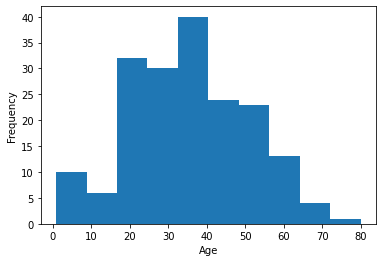

In [27]:
import matplotlib.pyplot as plt 
plt.xlabel("Histograme of diffrent age")
plt.xlabel("Age")
data_ti["Age"].plot.hist()

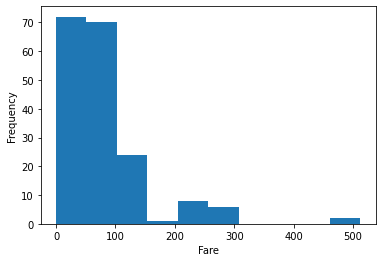

In [28]:
plt.xlabel("Histograme of diffrent Fare")
plt.xlabel("Fare")
data_ti["Fare"].plot.hist()

# pour les var catégoraile

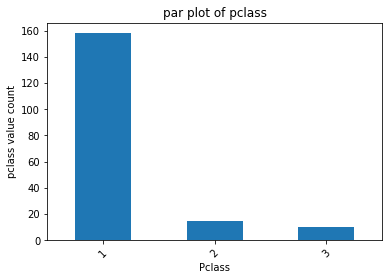

In [29]:
plt.xlabel("Pclass")
plt.ylabel("pclass value count")
plt.title("par plot of pclass")
vc = data_ti["Pclass"].value_counts()
vc.plot.bar(rot=45)

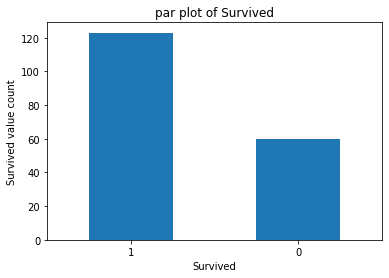

In [30]:

plt.xlabel("Survived")
plt.ylabel("Survived value count")
plt.title("par plot of Survived")
vc = data_ti["Survived"].value_counts()
vc.plot.bar(rot=0) # rot est l'engule de rotation l'abel(1 et 0) 

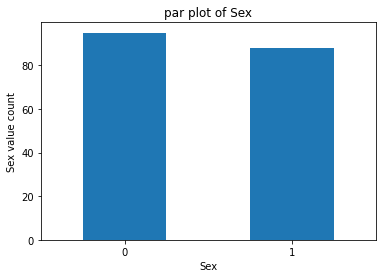

In [31]:
plt.xlabel("Sex")
plt.ylabel("Sex value count")
plt.title("par plot of Sex")
vc = data_ti["Sex"].value_counts()
vc.plot.bar(rot=0)

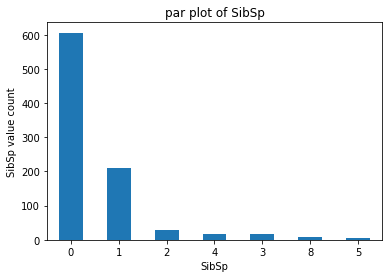

In [ ]:
plt.xlabel("SibSp")
plt.ylabel("SibSp value count")
plt.title("par plot of SibSp")
vc = data_ti["SibSp"].value_counts()
vc.plot.bar(rot=0)

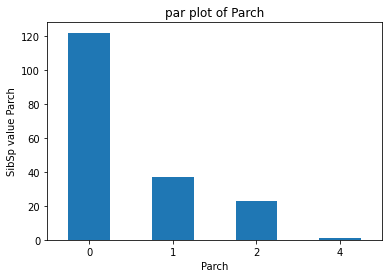

In [32]:
plt.xlabel("Parch")
plt.ylabel("SibSp value Parch")
plt.title("par plot of Parch")
vc = data_ti["Parch"].value_counts()
vc.plot.bar(rot=00)

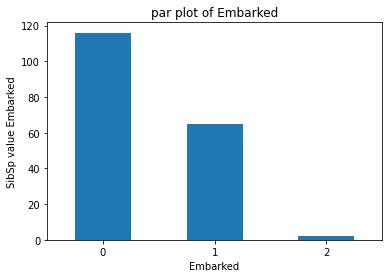

In [35]:
plt.xlabel("Embarked")
plt.ylabel("SibSp value Embarked")
plt.title("par plot of Embarked")
vc = data_ti["Embarked"].value_counts()
vc.plot.bar(rot=00)

boxplot

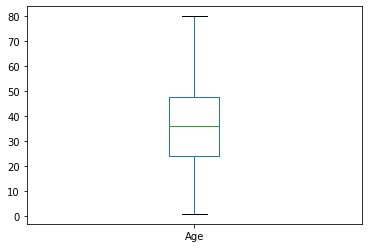

In [36]:
import matplotlib  as plt
data_ti["Age"].plot.box()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


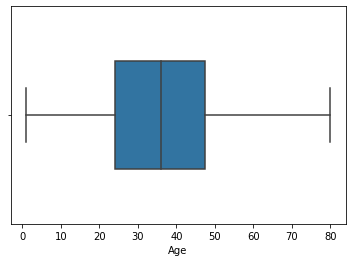

In [37]:
import seaborn as sns
sns.boxplot(data_ti["Age"], width=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


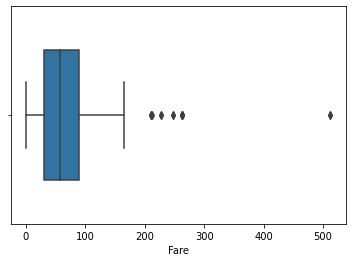

In [38]:
sns.boxplot(data_ti["Fare"], width=0.6)

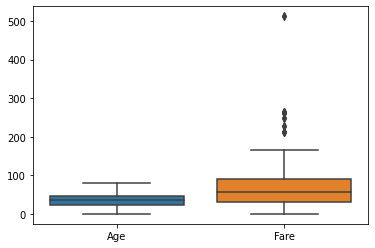

In [40]:
new_data = data_ti.drop(["Name","Cabin","Ticket","PassengerId","Survived","Pclass","Sex","Parch","SibSp",'Embarked'], axis=1)
sns.boxplot(data = new_data)

Standardisation avec Moyenne = 0 
Ecart =1 
 mis à l'échelle à la plage [-1, 1]

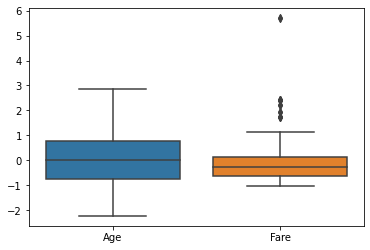

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data["Age"]=scaler.fit_transform(new_data[["Age"]].values)
new_data['Fare'] = scaler.fit_transform(new_data[["Fare"]].values)

sns.boxplot(data = new_data)


la corrélation entre sex et l'age et précise l'importance de l'age et sex dans la survive des individus.

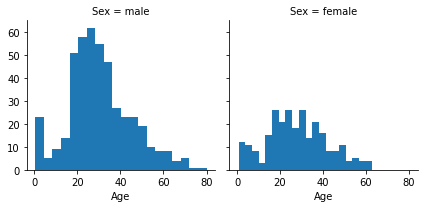

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

nom_file ="titanic-passengers"
data = pd.read_csv(nom_file + ".txt", delimiter=";")


g = sns.FacetGrid(data, col='Sex')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


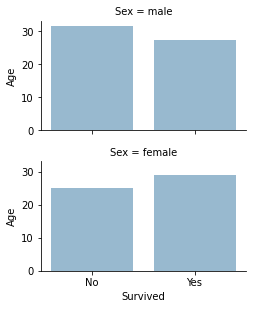

In [44]:
grid = sns.FacetGrid(data, row='Sex', size=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", "Age", alpha=.5 ,ci=None)
grid.add_legend()

choix de deux paramete et voir

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


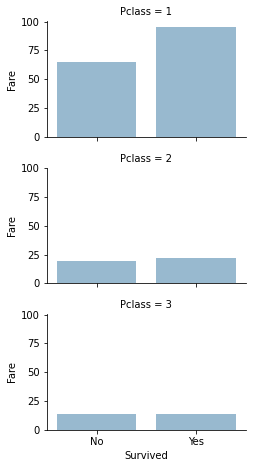

In [45]:
grid = sns.FacetGrid(data, row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", "Fare", alpha=.5 ,ci=None)
grid.add_legend() 

# la fonction 


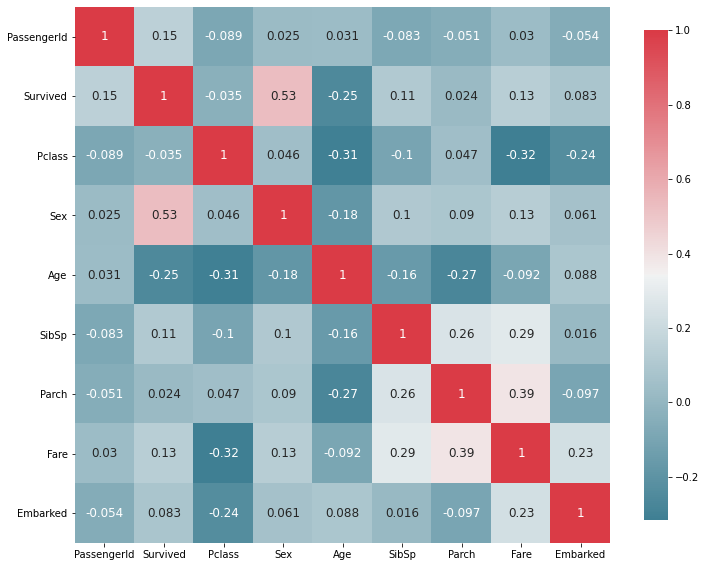

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns 

def plot_correlation_map(df):
  corr = df.corr()
  s, ax = plt.subplots(figsize=(12, 10) )
  cmap = sns.diverging_palette(220, 10, as_cmap= True)
  s=sns.heatmap(
      corr,
      cmap= cmap,
      square= True,
      cbar_kws = {'shrink':.9},
      ax=ax,
      annot = True,
      annot_kws = {'fontsize':12}
  )




plot_correlation_map(data_ti)


explication:


# group by

In [75]:
# relation entre pclass et survicu
#data_ti[["Pclass","Survived"]].groupby(["Survived"], as_index= True ).mean()
data_ti[["Pclass","Survived"]].groupby(["Pclass"], as_index= True ).mean()


,Survived
Pclass,
1,0.670886
2,0.800000
3,0.500000


0.67 des perssons de class 1 ont été survicu

 la plupart des persson de la class 2 ont été survicu

la moitié des persson de classe 3 ont été srvivicu

In [87]:
data = data_ti
data= data.drop("Name", axis = 1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,0,3,0,25.0,0,0,348123,7.6500,F G73,0
4,672,0,1,0,31.0,1,0,F.C. 12750,52.0000,B71,0
16,378,0,1,0,27.0,0,2,113503,211.5000,C82,1
19,225,1,1,0,38.0,1,0,19943,90.0000,C93,0
26,588,1,1,0,60.0,1,1,13567,79.2000,B41,1
...,...,...,...,...,...,...,...,...,...,...,...
862,619,1,2,1,4.0,2,1,230136,39.0000,F4,0
863,858,1,1,0,51.0,0,0,113055,26.5500,E17,0
865,196,1,1,1,58.0,0,0,PC 17569,146.5208,B80,1
875,463,0,1,0,47.0,0,0,111320,38.5000,E63,0


# créer une nouvelle collone 'titre' approprié pour chaque individu

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


KeyError: ignored

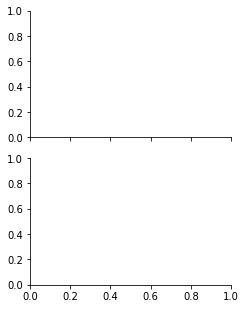

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
data_ti["titre"] = data_ti["Name"]
data_ti["titre"] 
grid = sns.FacetGrid(data, row='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, "titre", "Fare", alpha=.5 ,ci=None)
grid.add_legend() 


In [121]:
# titre avec autre fonctionnalité
#sex



1      Age est 000025.0 titre
4      Age est 000031.0 titre
16     Age est 000027.0 titre
19     Age est 000038.0 titre
26     Age est 000060.0 titre
                ...          
862    Age est 000004.0 titre
863    Age est 000051.0 titre
865    Age est 000058.0 titre
875    Age est 000047.0 titre
881    Age est 000049.0 titre
Name: titre, Length: 183, dtype: object

il y a beauquoup de titre qui rendent la fonctionnalité trés peu pratique

In [191]:
Titre_Dictionnaire ={
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Dr":"Officer",
    "Rev":"Officer",
    "jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "Lady":"Royalty",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Miss",
    "Mlle":"Miss",
    "Miss":"Miss",
    "Ms":"Mrs",
    "Mr":"Mrs",
    "Mrs":"Mrs", 
    "Master":"Master",
    } 

caracter_spicial= ['.',',']

    
new_col =[]

for ph in data_ti["titre"]:
  s=ph.split()
  for ch in s:
    v=""
    for i in range(len(ch)):
      if ch[i] not in caracter_spicial:
        v = v + ch[i]
    if v in Titre_Dictionnaire:
      new_col.append(Titre_Dictionnaire[v])
    else:
      new_col.append(0)
len(data_ti)

data_ti["titre"] = new_col


ValueError: ignored

In [165]:
caracter_spicial= ['.' ,',']
s = "aaaa ,bbbb zzz,z"
s.split()
v=[]
for i in s:
  
  if i not in caracter_spicial:
    print(i)
    v.append(i)
  elif i == " ":
    v
    v=[]




a
a
a
a
 
b
b
b
b
 
z
z
z
z
